# loading libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# loading training data

In [3]:
data = pd.read_csv("regression1.csv")
X = data.iloc[:,0].values
y = data.iloc[:,-1].values

In [4]:
X

array([235, 216, 148,  35,  85, 204,  49,  25, 173, 191, 134,  99, 117,
       112, 162, 272, 159, 159,  59, 198])

# normalization

In [42]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X) ## 對X做標準化

ValueError: Expected 2D array, got 1D array instead:
array=[235. 216. 148.  35.  85. 204.  49.  25. 173. 191. 134.  99. 117. 112.
 162. 272. 159. 159.  59. 198.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [43]:
## scikit-learn中希望數據要存於二維陣列中，而X是一個一維陣列

In [44]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X1 = X.reshape(-1,1)
X_std = sc_x.fit_transform(X1)

In [45]:
X1

array([[235],
       [216],
       [148],
       [ 35],
       [ 85],
       [204],
       [ 49],
       [ 25],
       [173],
       [191],
       [134],
       [ 99],
       [117],
       [112],
       [162],
       [272],
       [159],
       [159],
       [ 59],
       [198]])

# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_std, y)
y_pred = lr.predict(X_std)
print('Slope: %.3f' % lr.coef_[0]) #theta 1
print('Intecept: %.3f' % lr.intercept_) #theta 0

Slope: 95.564
Intecept: 428.600


In [50]:
print(lr)
print(lr.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[95.56399932]


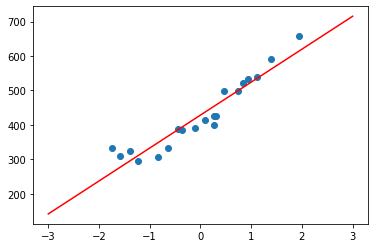

In [8]:
plt.scatter(X_std,y)

x = np.linspace(-3,3,100)
new = 428.6+(95.564*x)
plt.plot(x, new, 'r')

# 計算MSE和判定係數

In [11]:
import sklearn.metrics as sm

print('MSE: %.3f'% sm.mean_squared_error(y,y_pred))
print("R^2: %3f"% sm.r2_score(y,y_pred))

MSE: 978.262
R^2: 0.903245


# Polynomial Regression

## 二次式

In [65]:
from sklearn.preprocessing import PolynomialFeatures

pr = LinearRegression()
quadratic = PolynomialFeatures(degree = 2)
X_quad = quadratic.fit_transform(X_std)

print(quadratic)
print(X_quad) 

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')
[[ 1.          1.39433428  1.94416809]
 [ 1.          1.11069026  1.23363286]
 [ 1.          0.09554325  0.00912851]
 [ 1.         -1.59139223  2.53252924]
 [ 1.         -0.8449606   0.71395842]
 [ 1.          0.93154667  0.8677792 ]
 [ 1.         -1.38239138  1.91100592]
 [ 1.         -1.74067856  3.02996185]
 [ 1.          0.46875906  0.21973506]
 [ 1.          0.73747445  0.54386856]
 [ 1.         -0.11345761  0.01287263]
 [ 1.         -0.63595975  0.4044448 ]
 [ 1.         -0.36724436  0.13486842]
 [ 1.         -0.44188752  0.19526458]
 [ 1.          0.3045441   0.09274711]
 [ 1.          1.94669369  3.78961632]
 [ 1.          0.25975821  0.06747433]
 [ 1.          0.25975821  0.06747433]
 [ 1.         -1.23310505  1.52054807]
 [ 1.          0.84197488  0.70892169]]


In [66]:
print(X_std)

[[ 1.39433428]
 [ 1.11069026]
 [ 0.09554325]
 [-1.59139223]
 [-0.8449606 ]
 [ 0.93154667]
 [-1.38239138]
 [-1.74067856]
 [ 0.46875906]
 [ 0.73747445]
 [-0.11345761]
 [-0.63595975]
 [-0.36724436]
 [-0.44188752]
 [ 0.3045441 ]
 [ 1.94669369]
 [ 0.25975821]
 [ 0.25975821]
 [-1.23310505]
 [ 0.84197488]]


In [67]:
# fit linear features
pr.fit(X_quad, y)
y_quad_pred = pr.predict(X_quad)
print('theta1: %.3f' % pr.coef_[1])
print('theta2: %.3f' % pr.coef_[2])
print('Intercept: %.3f' %pr.intercept_)

theta1: 97.133
theta2: 22.623
Intercept: 405.977


In [68]:
pr.coef_

array([ 0.        , 97.13314163, 22.62345495])

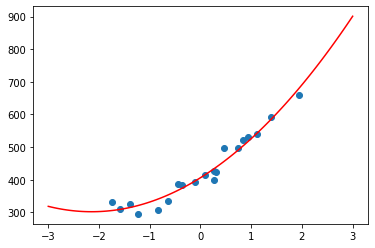

In [69]:
plt.scatter(X_std, y)

x = np.linspace(-3,3,100)
new = pr.intercept_+(pr.coef_[1]*x)+(pr.coef_[2]*(x**2))
plt.plot(x, new, 'r')

## 三次式

In [70]:
from sklearn.preprocessing import PolynomialFeatures

pr = LinearRegression()
quadratic = PolynomialFeatures(degree = 3)
X_quad = quadratic.fit_transform(X_std)

print(quadratic)
print(X_quad) 

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')
[[ 1.00000000e+00  1.39433428e+00  1.94416809e+00  2.71082022e+00]
 [ 1.00000000e+00  1.11069026e+00  1.23363286e+00  1.37018401e+00]
 [ 1.00000000e+00  9.55432485e-02  9.12851234e-03  8.72167723e-04]
 [ 1.00000000e+00 -1.59139223e+00  2.53252924e+00 -4.03024736e+00]
 [ 1.00000000e+00 -8.44960604e-01  7.13958422e-01 -6.03266740e-01]
 [ 1.00000000e+00  9.31546673e-01  8.67779204e-01  8.08376831e-01]
 [ 1.00000000e+00 -1.38239138e+00  1.91100592e+00 -2.64175810e+00]
 [ 1.00000000e+00 -1.74067856e+00  3.02996185e+00 -5.27418962e+00]
 [ 1.00000000e+00  4.68759063e-01  2.19735059e-01  1.03002800e-01]
 [ 1.00000000e+00  7.37474450e-01  5.43868564e-01  4.01089170e-01]
 [ 1.00000000e+00 -1.13457608e-01  1.28726287e-02 -1.46049766e-03]
 [ 1.00000000e+00 -6.35959748e-01  4.04444801e-01 -2.57210614e-01]
 [ 1.00000000e+00 -3.67244361e-01  1.34868421e-01 -4.95296672e-02]
 [ 1.00000000e+00 -4.418875

In [71]:
# fit linear features
pr.fit(X_quad, y)
y_quad_pred_3 = pr.predict(X_quad)
print('theta1: %.3f' % pr.coef_[1])
print('theta2: %.3f' % pr.coef_[2])
print('theta2: %.3f' % pr.coef_[3])
print('Intercept: %.3f' %pr.intercept_)

theta1: 118.007
theta2: 25.074
theta2: -9.504
Intercept: 402.867


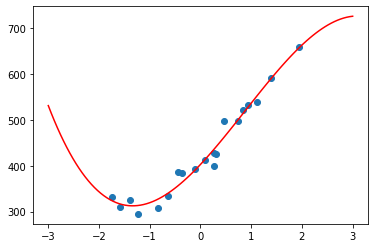

In [72]:
plt.scatter(X_std, y)

x = np.linspace(-3,3,100)
new = pr.intercept_+(pr.coef_[1]*x)+(pr.coef_[2]*(x**2))+(pr.coef_[3]*(x**3))
plt.plot(x, new, 'r')

In [73]:
##三次的
import sklearn.metrics as sm

print('MSE: %.3f'% sm.mean_squared_error(y,y_quad_pred_3))
print("R^2: %3f"% sm.r2_score(y,y_quad_pred_3))

MSE: 272.540
R^2: 0.973045


In [74]:
##二次的
import sklearn.metrics as sm

print('MSE: %.3f'% sm.mean_squared_error(y,y_quad_pred))
print("R^2: %3f"% sm.r2_score(y,y_quad_pred))

MSE: 377.582
R^2: 0.962655


# 糖尿病數據集 - 複回歸

## 數據集處理

In [78]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [79]:
import pandas as pd
feature = pd.DataFrame(data['data'], columns = data['feature_names'])
target = pd.DataFrame(data['target'], columns = ['target'])

df = pd.concat([feature, target], axis = 1)

In [81]:
# data 可以印出來觀察看看
print(feature)
print(target)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1  

In [87]:
print(feature.shape)
print(target.shape)

(442, 10)
(442, 1)


In [88]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


## 畫出散點圖

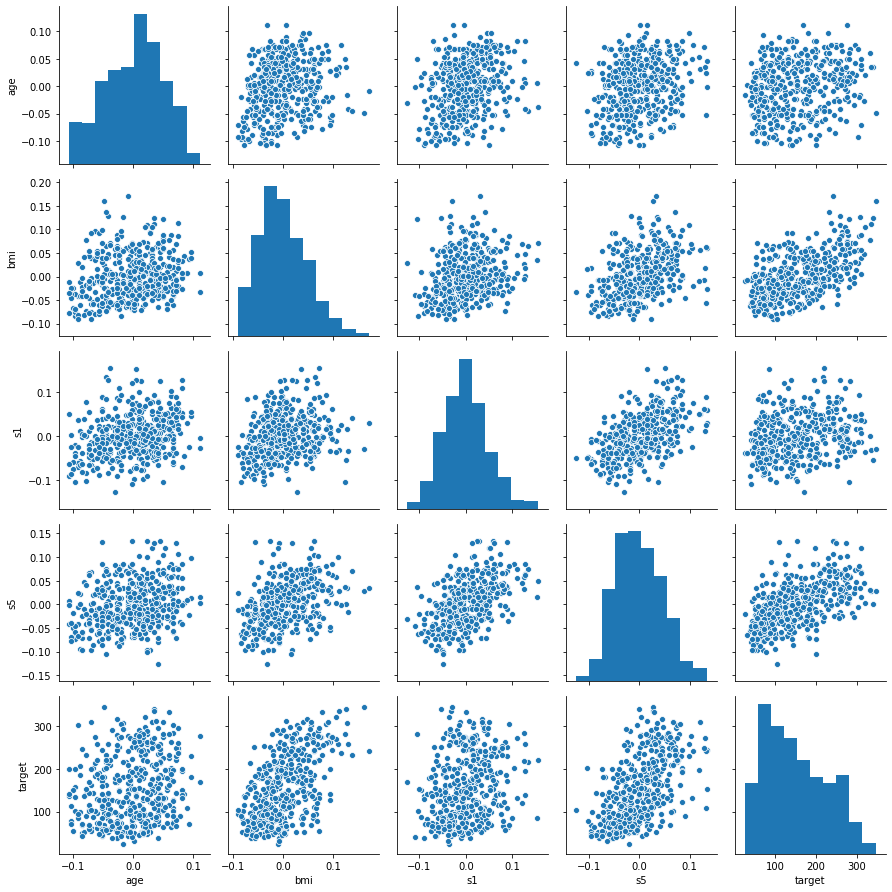

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age','bmi','s1','s5','target']

sns.pairplot(df[cols])
plt.tight_layout()
plt.savefig('scatterplot.png', dpi = 300)
plt.show()

## 以熱度圖畫出相關係數矩陣

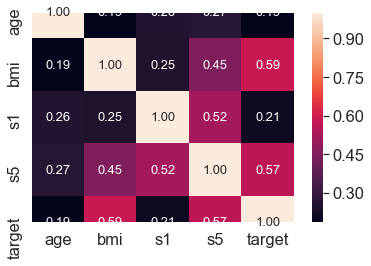

In [105]:
import numpy as np

cm = np.corrcoef(df[cols].values.T) #.T是轉置矩陣（因為python預設用列的方向計算）
#sns.set(font_scale = 1.5)
hm = sns.heatmap(cm,
                 cbar = True, #圖右手邊的長條熱度圖
                 annot = True, # 是否顯示數值
                 square = True, #是否為正方形
                 fmt = '.2f', #浮點數幾位
                 annot_kws = {'size': 13},
                 yticklabels = cols,
                 xticklabels = cols)

plt.tight_layout()
plt.savefig('correlation.png',dpi = 300)
plt.show()